In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
stats = {'data team':[2, 0, 3, 5, 2], 'pro team':[21, 32, 22, 40, 35]}
data = pd.DataFrame(data = stats)
data

,data team,pro team
0,2,21
1,0,32
2,3,22
3,5,40
4,2,35


In [3]:
data_mean = np.mean(data['data team'])
pro_mean = data['pro team'].mean()
mean_difference = pro_mean - data_mean
total_points = data['data team'].sum() + data['pro team'].sum()
mean_difference
total_points

162

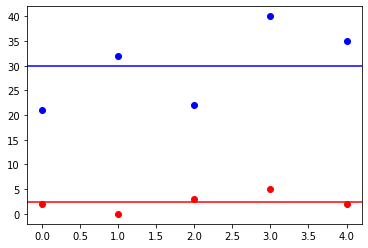

In [4]:
plt.scatter(x=data.index, y=data['data team'], c='r')
plt.scatter(x=data.index, y=data['pro team'], c='b')
plt.axhline(data_mean, c='r')
plt.axhline(pro_mean, c='b')

In [5]:
allplayers = pd.concat([data['data team'], data['pro team']], axis=0, ignore_index=True)
allplayers

0     2
1     0
2     3
3     5
4     2
5    21
6    32
7    22
8    40
9    35
dtype: int64

In [6]:
means50 = []
for n in range(50):
    order = np.random.permutation(allplayers)
    a = sum(order[:5])/len(order[:5])
    b = sum(order[5:])/len(order[5:])
    if a>=b:
        means50.append(a-b)
    else:
        means50.append(b-a)

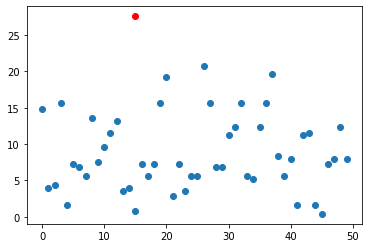

In [7]:
meanies = pd.Series(means50)
plt.scatter(x=meanies.index, y=meanies)
plt.scatter(x=15, y=mean_difference, c='r')

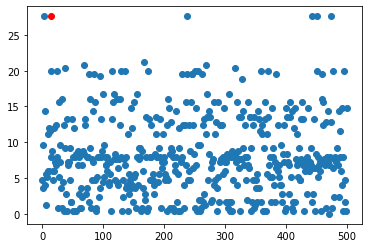

In [8]:
means500 = []
for n in range(500):
    order = np.random.permutation(allplayers)
    a = sum(order[:5])/len(order[:5])
    b = sum(order[5:])/len(order[5:])
    if a>=b:
        means500.append(a-b)
    else:
        means500.append(b-a)

meanies = pd.Series(means500)
plt.scatter(x=meanies.index, y=meanies)
plt.scatter(x=15, y=mean_difference, c='r')

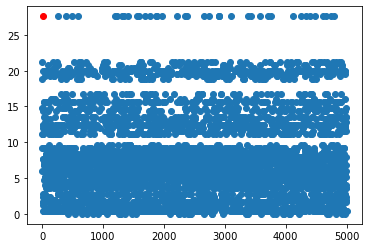

In [9]:
means5000 = []
for n in range(5000):
    order = np.random.permutation(allplayers)
    a = sum(order[:5])/len(order[:5])
    b = sum(order[5:])/len(order[5:])
    if a>=b:
        means5000.append(a-b)
    else:
        means5000.append(b-a)

meanies = pd.Series(means5000)
plt.scatter(x=meanies.index, y=meanies)
plt.scatter(x=15, y=mean_difference, c='r')

In [22]:
means50 = []
order50 = []
teama = []
teamb = []
for n in range(50):
    order = np.random.permutation(allplayers)
    teama.append(order[:5])
    teamb.append(order[5:])
    a = sum(order[:5])/len(order[:5])
    b = sum(order[5:])/len(order[5:])
    if a>=b:
        a_mean = a - b
        means50.append(a_mean)
        if 10 < a_mean < 17.5:
            order50.append(order[:5])
    else:
        b_mean = b - a
        means50.append(b_mean)
        if 10 < b_mean < 17.5:
            order50.append(order[5:])

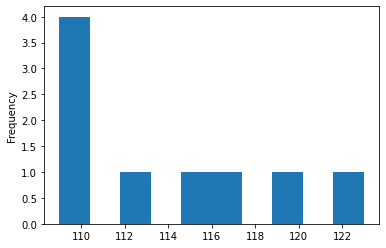

    0   1   2   3   4  totals  averages
0  32  22  35  21   0     110     27.50
1  35  40  21  22   2     120     29.50
2  32  22  21  35   5     115     27.50
3   0  32   5  35  40     112     18.00
4  22  21   2  32  40     117     19.25
5   3  32  35   0  40     110     17.50
6  22  21  35   5  40     123     20.75
7  32  35   0  22  21     110     22.25
8  35  40  32   2   0     109     27.25


In [23]:

sums = pd.DataFrame(order50)
sums['totals'] = sums.sum(axis=1)
sums['averages'] = sums.iloc[:, 0:4].mean(axis=1)
sums['totals'].plot.hist()
plt.show()
print(sums)

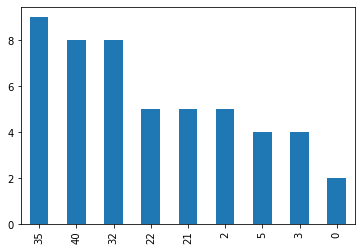

In [18]:
allnums = []
for v in order50:
    for x in v:
        allnums.append(x)
        
allnums = pd.Series(allnums).value_counts()
allnums.plot.bar()

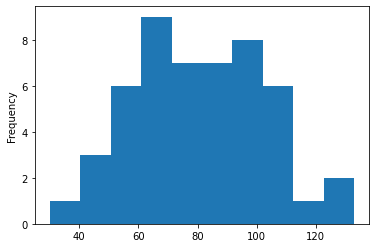

In [28]:
ta = pd.DataFrame(teama)
ta['totals']= ta.sum(axis=1)
ta['totals'].plot.hist()

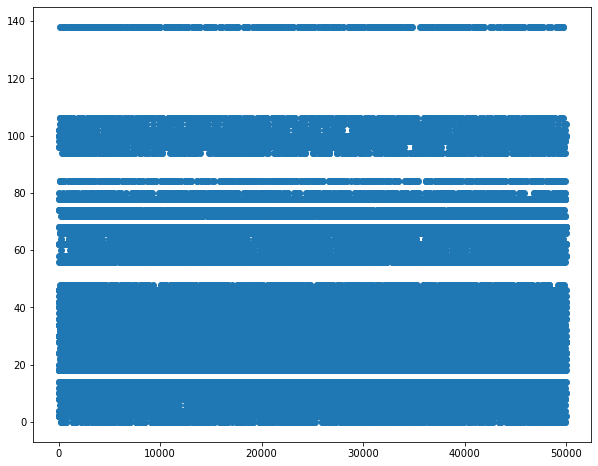

In [44]:
scores5000 = []
for n in range(50000):
    order = np.random.permutation(allplayers)
    a = sum(order[:5])
    b = sum(order[5:])
    scores5000.append(abs(a-b))
    

scories = pd.Series(scores5000)
plt.figure(figsize=(10,8))
plt.scatter(x=scories.index, y=scories)


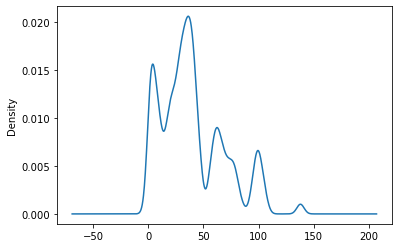

In [45]:
sf = scories.value_counts()
scories.plot.kde()